 MNIST Dimensionality Reduction

I will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('mnist_dataset.csv')

# Separate the features (X) and the labels (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42)

Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [2]:
# YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier
import time

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Start the timer
start_time = time.time()

# Train the Random Forest classifier on the training set
rf_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

# Evaluate the model on the test set
accuracy = rf_classifier.score(X_test, y_test)

# Print the results
print("Training time: {:.2f} seconds".format(training_time))
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

Training time: 50.89 seconds
Accuracy on test set: 96.89%


Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [3]:
from sklearn.decomposition import PCA

# Create a PCA object with 95% variance explained
pca = PCA(n_components=0.95, random_state=42)

# Apply PCA on the training set
X_train_pca = pca.fit_transform(X_train)

# Apply PCA on the test set
X_test_pca = pca.transform(X_test)

# Create a new Random Forest classifier object
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Start the timer
start_time_pca = time.time()

# Train the Random Forest classifier on the reduced training set
rf_classifier_pca.fit(X_train_pca, y_train)

# Calculate the training time
training_time_pca = time.time() - start_time_pca

# Evaluate the classifier on the reduced test set
accuracy_pca = rf_classifier_pca.score(X_test_pca, y_test)

# Print the results
print("PCA Training time: {:.2f} seconds".format(training_time_pca))
print("Accuracy on PCA-reduced test set: {:.2f}%".format(accuracy_pca * 100))


#Notes: Training was faster but accuracy was much lower.

PCA Training time: 35.63 seconds
Accuracy on PCA-reduced test set: 9.95%


Use t-SNE to reduce the MNIST dataset, show result graphically.

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


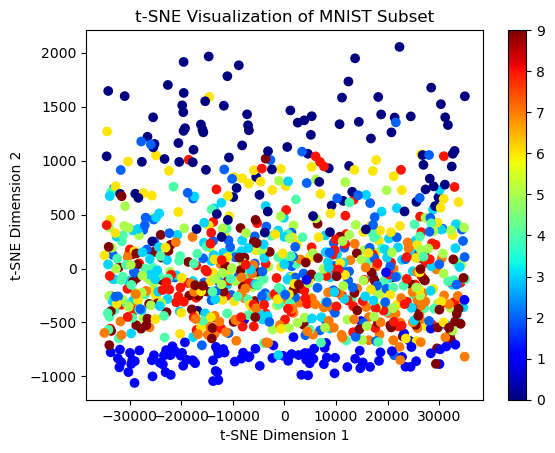

In [4]:
# YOUR CODE HERE

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# Reduce dataset size
subset_size = 1000  # Adjust the subset size as per your preference
random_indices = random.sample(range(len(X_train)), subset_size)
X_train_subset = X_train.iloc[random_indices]
y_train_subset = y_train.iloc[random_indices]

# Apply t-SNE on the subset
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_train_tsne = tsne.fit_transform(X_train_subset)

# Visualize the t-SNE result
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_subset, cmap='jet')
plt.colorbar()
plt.title("t-SNE Visualization of MNIST Subset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()



Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

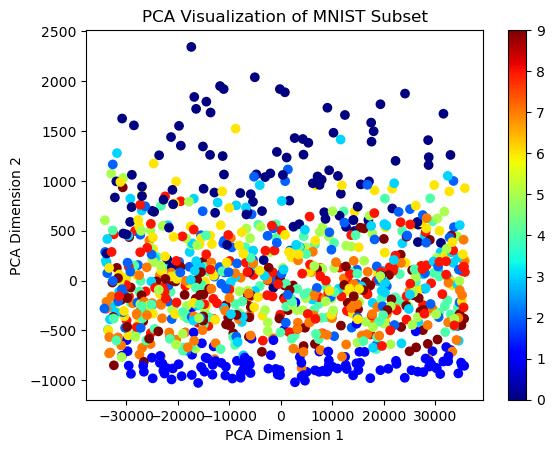

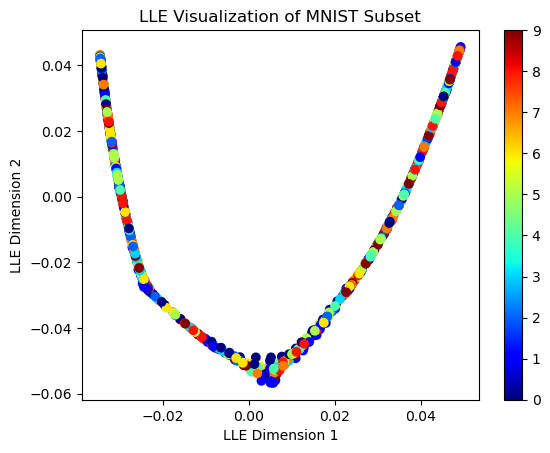

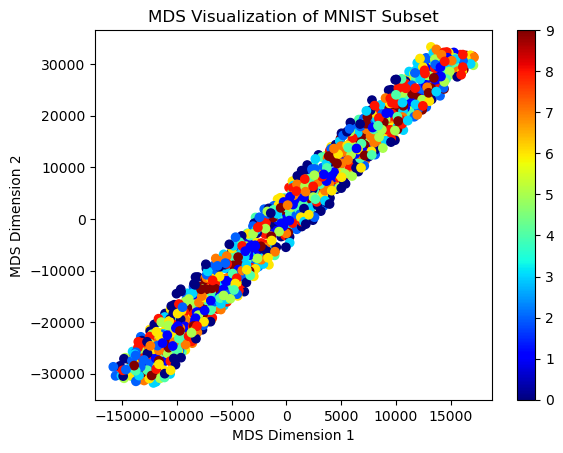

In [9]:
# YOUR CODE HERE

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, MDS
import matplotlib.pyplot as plt

# Reduce dataset size
subset_size = 1000  # Adjust the subset size as per your preference
X_train_subset = X_train.sample(n=subset_size, random_state=42)
y_train_subset = y_train[X_train_subset.index]

# Apply PCA on the subset
pca = PCA(n_components=2, random_state=42, svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train_subset)

# Apply LLE on the subset
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_train_lle = lle.fit_transform(X_train_subset)

# Apply MDS on the subset
mds = MDS(n_components=2, random_state=42)
X_train_mds = mds.fit_transform(X_train_subset)

# Visualize PCA results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_subset, cmap='jet')
plt.colorbar()
plt.title("PCA Visualization of MNIST Subset")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

# Visualize LLE results
plt.scatter(X_train_lle[:, 0], X_train_lle[:, 1], c=y_train_subset, cmap='jet')
plt.colorbar()
plt.title("LLE Visualization of MNIST Subset")
plt.xlabel("LLE Dimension 1")
plt.ylabel("LLE Dimension 2")
plt.show()

# Visualize MDS results
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train_subset, cmap='jet')
plt.colorbar()
plt.title("MDS Visualization of MNIST Subset")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()
